# Upper Confidence Bound (UCB)

Problem statement: Multi Armed Bandit Problem.

The Multiple slot machine(One arm bandit) problem. Find out which machine is the best one?

And the Modern Ex would be selecting the best AD out of 100 ADs.How to you decide which AD is going to be the best? other than AB tets?

**Intuition:**
1. It assume some starting value for each machine /AD.
2. It creates a confidence band,it is designed in a way that it will include the actual expected results.
3. A eando M/C will be selected.
4. then we do a test , If the person didn't click the AD the starting value reduces. Also confidence Interval reduces.
5. then one from the higher confidence bound selected.
6. Again we run the test, If the person clicks he AD then the confidence bound decreases.
7. then again the bigger confidence bound is selected.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


# Implementing UCB

<img src="UCB_Algorithm_Slide.png">

In [3]:
import math
N = 1000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualizing the Results

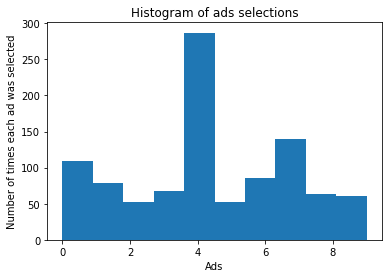

In [4]:
import matplotlib.pyplot as plt
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()